# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Baca data CSV
df = pd.read_csv("scrapped_Tiktok_EN.csv")  # Ganti dengan path file aslimu


In [3]:
df = df.dropna(subset=["content"])  # Hapus baris dengan content kosong
reviews = df["content"].astype(str)  # Konversi ke string

In [4]:
df["at"] = pd.to_datetime(df["at"])  # Ubah ke format tanggal
df_filtered = df[df["at"].dt.year == 2024]

df_filtered.shape


(18996, 11)

In [5]:
df = df_filtered.sample(min(len(df_filtered), 6000), random_state=42)  # Ambil 6000 data 
df.score.value_counts()

score
1    2196
5    1892
3     672
4     633
2     607
Name: count, dtype: int64

In [6]:
import re
import string
from typing import List
from nltk.tokenize import word_tokenize

# preprocess_and_tokenize

def tokenize(text: str) -> List[str]:
    # 1. Bersihkan teks (menghapus mention, hashtag, URL, angka, RT, dan tanda baca)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Hapus mention (@user)
    text = re.sub(r'#\w+', '', text)  # Hapus hashtag (#hashtag)
    text = re.sub(r"\d+", "", text)  # Hapus angka
    text = re.sub(r'RT[\s]+', '', text)  # Hapus "RT"
    text = re.sub(r'https?://\S+', '', text)  # Hapus URL
    text = text.translate(str.maketrans("", "", string.punctuation))  # Hapus tanda baca
    text = text.lower().strip()  # Konversi ke lowercase dan hapus spasi berlebih

    # 2. Tokenisasi menggunakan word_tokenize dari NLTK
    tokens = word_tokenize(text)

    return tokens  # Output dalam bentuk list kata


In [7]:
df["tokens"] = df["content"].apply(tokenize)
df[["content", "tokens"]].head()  # Cek hasil tokenisasi

,content,tokens
2360,Why can't I put caption on my repost?!?!!,"[why, cant, i, put, caption, on, my, repost]"
9545,Sometimes I can't open it please fix it,"[sometimes, i, cant, open, it, please, fix, it]"
42,"I hate tiktok, When I want to create a new acc...","[i, hate, tiktok, when, i, want, to, create, a..."
3887,It has many bugs it's not worth it to install ...,"[it, has, many, bugs, its, not, worth, it, to,..."
3710,Earning coins while watching,"[earning, coins, while, watching]"


In [8]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

df["tokens_no_stopwords"] = df["tokens"].apply(remove_stopwords)

print(df[["tokens", "tokens_no_stopwords"]].head())  # Cek hasilnya


                                                 tokens  \
2360       [why, cant, i, put, caption, on, my, repost]   
9545    [sometimes, i, cant, open, it, please, fix, it]   
42    [i, hate, tiktok, when, i, want, to, create, a...   
3887  [it, has, many, bugs, its, not, worth, it, to,...   
3710                  [earning, coins, while, watching]   

                                    tokens_no_stopwords  
2360                       [cant, put, caption, repost]  
9545               [sometimes, cant, open, please, fix]  
42    [hate, tiktok, want, create, new, account, ran...  
3887    [many, bugs, worth, install, hope, tiktok, fix]  
3710                         [earning, coins, watching]  


In [9]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
stemmer = PorterStemmer()

def stemming(tokens):
    return [stemmer.stem(word) for word in tokens]

df["tokens_stemmed"] = df["tokens_no_stopwords"].apply(stemming)

# print(df[["tokens_no_stopwords", "tokens_stemmed"]].head())  # Cek hasilnya
# df[["tokens_no_stopwords", "tokens_stemmed"]].head()


In [10]:
# import nltk
# nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatization(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df["tokens_lemmatized"] = df["tokens_no_stopwords"].apply(lemmatization)

# print(df[["tokens_no_stopwords", "tokens_lemmatized"]].head())  # Cek hasilnya


In [11]:
df[["tokens_no_stopwords", "tokens_stemmed", "tokens_lemmatized"]].head()

,tokens_no_stopwords,tokens_stemmed,tokens_lemmatized
2360,"[cant, put, caption, repost]","[cant, put, caption, repost]","[cant, put, caption, repost]"
9545,"[sometimes, cant, open, please, fix]","[sometim, cant, open, pleas, fix]","[sometimes, cant, open, please, fix]"
42,"[hate, tiktok, want, create, new, account, ran...","[hate, tiktok, want, creat, new, account, rand...","[hate, tiktok, want, create, new, account, ran..."
3887,"[many, bugs, worth, install, hope, tiktok, fix]","[mani, bug, worth, instal, hope, tiktok, fix]","[many, bug, worth, install, hope, tiktok, fix]"
3710,"[earning, coins, watching]","[earn, coin, watch]","[earning, coin, watching]"


In [12]:
def label_sentiment(score):
  if score <= 2:
    return 0
  else:
    return 1

df['sentimen'] = df['score'].apply(label_sentiment)

In [13]:
sentiment_counts = df.sentimen.value_counts()
sentiment_counts

sentimen
1    3197
0    2803
Name: count, dtype: int64

In [14]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,tokens,tokens_no_stopwords,tokens_stemmed,tokens_lemmatized,sentimen
2360,aed8e7d9-f07c-4eb4-aaad-623e8749eaa3,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Why can't I put caption on my repost?!?!!,1,0,37.0.4,2024-10-26 09:03:07,NaN,NaN,37.0.4,"[why, cant, i, put, caption, on, my, repost]","[cant, put, caption, repost]","[cant, put, caption, repost]","[cant, put, caption, repost]",0
9545,a6ef5e66-de49-4a93-b98a-c66bc686bc9d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Sometimes I can't open it please fix it,4,0,28.5.4,2024-08-18 16:02:28,NaN,NaN,28.5.4,"[sometimes, i, cant, open, it, please, fix, it]","[sometimes, cant, open, please, fix]","[sometim, cant, open, pleas, fix]","[sometimes, cant, open, please, fix]",1
42,2d33acbf-a885-441a-8a12-3d649a84c217,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I hate tiktok, When I want to create a new acc...",1,25,37.2.6,2024-11-19 11:52:07,NaN,NaN,37.2.6,"[i, hate, tiktok, when, i, want, to, create, a...","[hate, tiktok, want, create, new, account, ran...","[hate, tiktok, want, creat, new, account, rand...","[hate, tiktok, want, create, new, account, ran...",0
3887,9167075e-8c4c-46c9-825d-3035bfea9117,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It has many bugs it's not worth it to install ...,1,0,NaN,2024-10-10 11:27:00,NaN,NaN,NaN,"[it, has, many, bugs, its, not, worth, it, to,...","[many, bugs, worth, install, hope, tiktok, fix]","[mani, bug, worth, instal, hope, tiktok, fix]","[many, bug, worth, install, hope, tiktok, fix]",0
3710,762ea22c-531a-470b-be7f-91b218adfca6,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Earning coins while watching,5,0,36.7.4,2024-10-12 09:57:52,NaN,NaN,36.7.4,"[earning, coins, while, watching]","[earning, coins, watching]","[earn, coin, watch]","[earning, coin, watching]",1


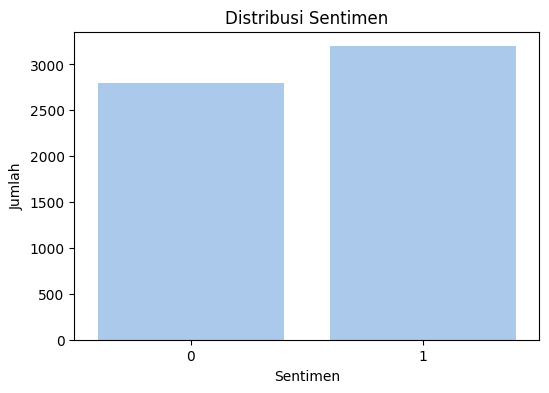

In [15]:
# Visualisasi
sns.set_palette("pastel")
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentimen')
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [16]:
data_negatif = df[df['sentimen'] == 0]
data_positif = df[df['sentimen'] == 1]

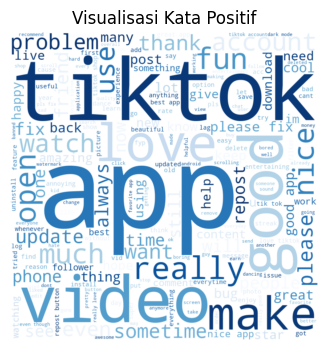

In [17]:
from wordcloud import WordCloud

all_text_s1 = ' '.join(word for word in data_positif['content'])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, background_color='white', mode="RGBA").generate(all_text_s1)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Positif")
plt.show()


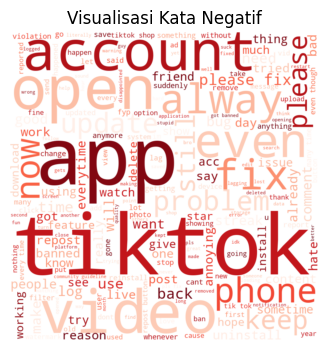

In [18]:
all_text_s0 = ' '.join(word for word in data_negatif['content'])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, background_color='white', mode="RGBA").generate(all_text_s0)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.show()


In [19]:
total_corpus = set(word for tokens in df["tokens_lemmatized"] for word in tokens)

word_count_list = []
for tokens in df["tokens_lemmatized"]:
    word_count = dict.fromkeys(total_corpus, 0)
    for word in tokens:
        word_count[word] += 1
    word_count_list.append(word_count)


In [20]:
# word_counts = []

# # Iterasi setiap review dalam dataset
# for tokens in df["tokens"]:
#     word_count = dict.fromkeys(total_corpus, 0)  # Inisialisasi semua kata dengan 0
#     for word in tokens:
#         word_count[word] += 1  # Hitung kemunculan kata dalam review
#     word_counts.append(word_count)

# # Konversi ke DataFrame
# freq_df = pd.DataFrame(word_counts)

# # Menampilkan semua baris (opsional, bisa menyebabkan output panjang)
# pd.set_option("display.max_rows", None)

# # Tampilkan DataFrame Transpose agar lebih mudah dibaca
# freq_df.T.head(5)


In [21]:
def compute_tf(tokens):
    total_words = len(tokens)
    if total_words == 0:
        return {}
    word_counts = {word: tokens.count(word) / total_words for word in set(tokens)}
    return word_counts



df["tf"] = df["tokens_lemmatized"].apply(compute_tf)  # Hitung TF untuk setiap review
df[["tokens_lemmatized", "tf"]]


,tokens_lemmatized,tf
2360,"[cant, put, caption, repost]","{'put': 0.25, 'caption': 0.25, 'cant': 0.25, '..."
9545,"[sometimes, cant, open, please, fix]","{'open': 0.2, 'cant': 0.2, 'please': 0.2, 'fix..."
42,"[hate, tiktok, want, create, new, account, ran...","{'like': 0.027777777777777776, 'ready': 0.0277..."
3887,"[many, bug, worth, install, hope, tiktok, fix]","{'bug': 0.14285714285714285, 'hope': 0.1428571..."
3710,"[earning, coin, watching]","{'watching': 0.3333333333333333, 'coin': 0.333..."
...,...,...
6383,"[nice, good, app, 💯]","{'nice': 0.25, 'good': 0.25, 'app': 0.25, '💯':..."
944,"[past, day, try, open, tiktok, blocking, phone...","{'improvement': 0.027777777777777776, 'day': 0..."
11098,"[tiktok, kept, violating, video, even, tho, ru...","{'tiktok': 0.15384615384615385, 'pls': 0.07692..."
9840,"[reinstall, get, app, everytime]","{'get': 0.25, 'everytime': 0.25, 'reinstall': ..."


In [22]:
def compute_idf(df):
    N = len(df)  # Jumlah total dokumen
    total_corpus = set(word for tokens in df["tokens_lemmatized"] for word in tokens)  # Semua kata unik

    # Hitung DF (jumlah dokumen yang mengandung setiap kata)
    df_counts = {word: sum(1 for tokens in df["tokens_lemmatized"] if word in tokens) for word in total_corpus}

    # Hitung IDF menggunakan rumus
    idf = {word: np.log(N / (df_counts[word] + 1)) for word in total_corpus}  # +1 untuk menghindari pembagian nol
    return idf

idf_values = compute_idf(df)  # Simpan nilai IDF untuk setiap kata


In [23]:
print(len(idf_values))  # Harus sesuai dengan jumlah dokumen dalam dataset

7005


In [24]:
idf_values

{'tea': 8.006367567650246,
 'very²': 8.006367567650246,
 'fk': 8.006367567650246,
 'pasting': 8.006367567650246,
 'hax': 8.006367567650246,
 'then🤔': 8.006367567650246,
 'bother': 6.620073206530356,
 'grande': 8.006367567650246,
 'significant': 6.753604599154879,
 'reached': 6.396929655216146,
 'received': 6.907755278982137,
 'zillion': 7.600902459542082,
 'allow': 5.115995809754082,
 'submit': 6.753604599154879,
 'unwind': 8.006367567650246,
 'tweaking': 8.006367567650246,
 '😔😭': 8.006367567650246,
 'toobecause': 8.006367567650246,
 'pin': 7.090076835776092,
 'smhhh': 8.006367567650246,
 'nice😊❤': 8.006367567650246,
 'reinstal': 8.006367567650246,
 'accon': 8.006367567650246,
 'genuine': 7.313220387090301,
 'apple': 7.600902459542082,
 'gonekeep': 8.006367567650246,
 'msgvideo': 8.006367567650246,
 'best🫶': 8.006367567650246,
 'mm': 8.006367567650246,
 'open😠😠😠': 8.006367567650246,
 'severe': 8.006367567650246,
 'pleaseeee': 6.753604599154879,
 'glitched': 8.006367567650246,
 'ince': 

In [25]:
def compute_tfidf(tf_dict, idf_dict):
    return {word: tf_dict[word] * idf_dict[word] for word in tf_dict.keys()}

df["tfidf"] = df["tf"].apply(lambda tf: compute_tfidf(tf, idf_values))
df[["tokens_lemmatized", "tfidf"]]

,tokens_lemmatized,tfidf
2360,"[cant, put, caption, repost]","{'put': 1.0555444834329963, 'caption': 1.30844..."
9545,"[sometimes, cant, open, please, fix]","{'open': 0.4296868826333575, 'cant': 0.3648565..."
42,"[hate, tiktok, want, create, new, account, ran...","{'like': 0.05360757698215803, 'ready': 0.19694..."
3887,"[many, bug, worth, install, hope, tiktok, fix]","{'bug': 0.44676581657606107, 'hope': 0.4924630..."
3710,"[earning, coin, watching]","{'watching': 1.2186965437636483, 'coin': 1.766..."
...,...,...
6383,"[nice, good, app, 💯]","{'nice': 0.7391278901001774, 'good': 0.5191946..."
944,"[past, day, try, open, tiktok, blocking, phone...","{'improvement': 0.1776924904226707, 'day': 0.0..."
11098,"[tiktok, kept, violating, video, even, tho, ru...","{'tiktok': 0.1737826296873139, 'pls': 0.274585..."
9840,"[reinstall, get, app, everytime]","{'get': 0.7391278901001774, 'everytime': 0.912..."


In [26]:
df_tfidf = pd.DataFrame.from_records(df["tfidf"]).fillna(0)  # Mengisi NaN dengan 0
df_tfidf.head()  # Menampilkan hasil


,put,caption,cant,repost,open,please,fix,sometimes,like,ready,...,fac,thailand,shoptiktok,😄😜,ehat,grrrrrrr,lala,tiktol,fixbut,loll
0,1.055544,1.308445,0.456071,0.809982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.364857,0.000000,0.429687,0.440548,0.419929,0.650555,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053608,0.196947,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.299949,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
statistik_tfidf = df_tfidf.describe()
statistik_tfidf

,put,caption,cant,repost,open,please,fix,sometimes,like,ready,...,fac,thailand,shoptiktok,😄😜,ehat,grrrrrrr,lala,tiktol,fixbut,loll
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.003957,0.003267,0.035883,0.017748,0.030914,0.019036,0.020657,0.013335,0.032576,0.000276,...,0.000067,0.000089,0.000089,0.000133,0.000095,0.000095,0.000095,0.000037,0.000037,0.000191
std,0.040681,0.052166,0.105654,0.106312,0.105997,0.066967,0.068246,0.081857,0.120023,0.012937,...,0.005168,0.006891,0.006891,0.010336,0.007383,0.007383,0.007383,0.002871,0.002871,0.014766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.055544,1.308445,0.912141,1.619965,1.074217,0.734247,1.049822,1.084259,1.929873,0.886260,...,0.400318,0.533758,0.533758,0.800637,0.571883,0.571883,0.571883,0.222399,0.222399,1.143767


In [28]:
statistik_tfidf.why.mean()


750.1926341820964

In [29]:
def Train_Test_Split(x, y, random_seed=None, test_size=0.2):
    n = len(x)
    if random_seed:
        np.random.seed(random_seed)
    
    test_size = int(test_size * n)
    indices = np.random.permutation(n)
    
    train_indices, test_indices = indices[test_size:], indices[:test_size]
    
    return x[train_indices], x[test_indices], y[train_indices], y[test_indices]

# Pastikan df_tfidf dan df["sentimen"] sudah berbentuk array
X_train, X_test, y_train, y_test = Train_Test_Split(
    df_tfidf.values, df["sentimen"].values, random_seed=42
)

print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))


Jumlah data train: 4800
Jumlah data test: 1200


In [30]:
class KNN:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.x = None
        self.y = None
        self.total_iteration = 0
        self.iteration = 0

    def fit(self, x,  y):
        if x.shape[0] != y.shape[0]:
            raise ValueError(f"Error: Cannot fit with different sizes x ({x.shape[0]}) and y ({y.shape[0]})")

        
        self.x = np.array(x)
        self.y = np.array(y)

    def _predict(self, x_predict):
        self.iteration += 1
        print(self.iteration, "/", self.total_iteration)
        print("counting distance . . .")
        distance = np.array([np.sqrt(np.sum((x_train-x_predict)**2)) for x_train in self.x])

        max_distance = np.argsort(distance)[:self.n_neighbors]
        print("labeling . . .")
        label = [self.y[i] for i in max_distance]
        # return np.bincount(label).argmax()
        return np.bincount(np.array(label, dtype=int)).argmax()


        
    def predict(self, x_predict):
        self.total_iteration = len(x_predict)
        self.iteration = 0
        x_predict = np.array(x_predict)
        predicted = [self._predict(x) for x in x_predict]
        return np.array(predicted)
    
    def accuracy(self, y_true, y_pred):
        intersection = 0
        for i in range(len(y_true)):
            if y_true[i] == y_pred[i]:
                intersection += 1

        return intersection / len(y_true)
        

In [31]:
model = KNN(n_neighbors=7)


In [32]:
# 4. Training model
model.fit(X_train, y_train)


In [33]:
# y_pred = model.predict(X_test)


In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import tkinter as tk
from tkinter import messagebox


In [35]:
# Konversi teks ke fitur numerik dengan TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["content"])  # Konversi teks ke vektor TF-IDF
y = df["sentimen"].values  # Label target

# Bagi data menjadi train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
knn = KNeighborsClassifier(n_neighbors=5)  # K=5
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [37]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model KNN: {accuracy:.2f}")


Akurasi Model KNN: 0.73


In [38]:
def predict_sentiment():
    text = entry.get()
    if not text:
        messagebox.showwarning("Input Error", "Masukkan teks terlebih dahulu!")
        return

    # Ubah input teks ke format TF-IDF
    x_input = vectorizer.transform([text])

    # Prediksi sentimen
    pred = knn.predict(x_input)[0]
    result = "POSITIF 😊" if pred == 1 else "NEGATIF 😞"

    # Tampilkan hasil
    result_label.config(text=f"Prediksi Sentimen: {result}")


In [39]:
root = tk.Tk()
root.title("Klasifikasi Sentimen - KNN")

tk.Label(root, text="Masukkan Teks:", font=("Arial", 12)).pack(pady=5)
entry = tk.Entry(root, width=50, font=("Arial", 12))
entry.pack(pady=5)

tk.Button(root, text="Prediksi Sentimen", command=predict_sentiment, font=("Arial", 12)).pack(pady=10)
result_label = tk.Label(root, text="Hasil: ", font=("Arial", 14, "bold"))
result_label.pack(pady=10)

root.mainloop()
